In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [189]:
df = pd.read_csv('IPM.csv')
df.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [191]:
df.shape

(2196, 5)

In [192]:
df.duplicated().sum()

0

In [193]:
df.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

In [194]:
df['IPM'].replace(['Low', 'Normal', 'High', 'Very-High'],[0,1,2,3],inplace=True)
df.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,2
1,13.90,7148,9.48,65.28,1
2,14.32,8776,8.68,67.43,1
3,14.60,8180,8.88,64.40,1
4,14.01,8030,9.67,68.22,1


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.9 KB


# visualisasi data

In [196]:
df['IPM'].value_counts()

1    1128
2     829
3     146
0      93
Name: IPM, dtype: int64

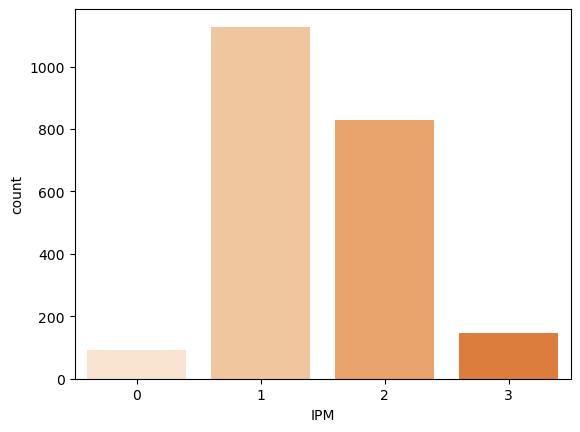

In [197]:
colors = sns.color_palette("Oranges")
sns.countplot(data=df, x='IPM', palette=colors)
# plt.xticks(rotation = 90)
plt.show()

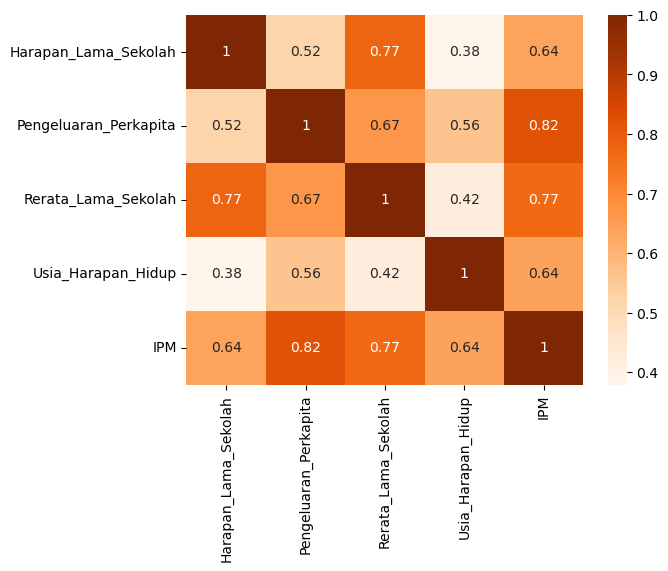

In [247]:
sns.heatmap(df.corr(), cmap="Oranges", annot=True)
plt.show()

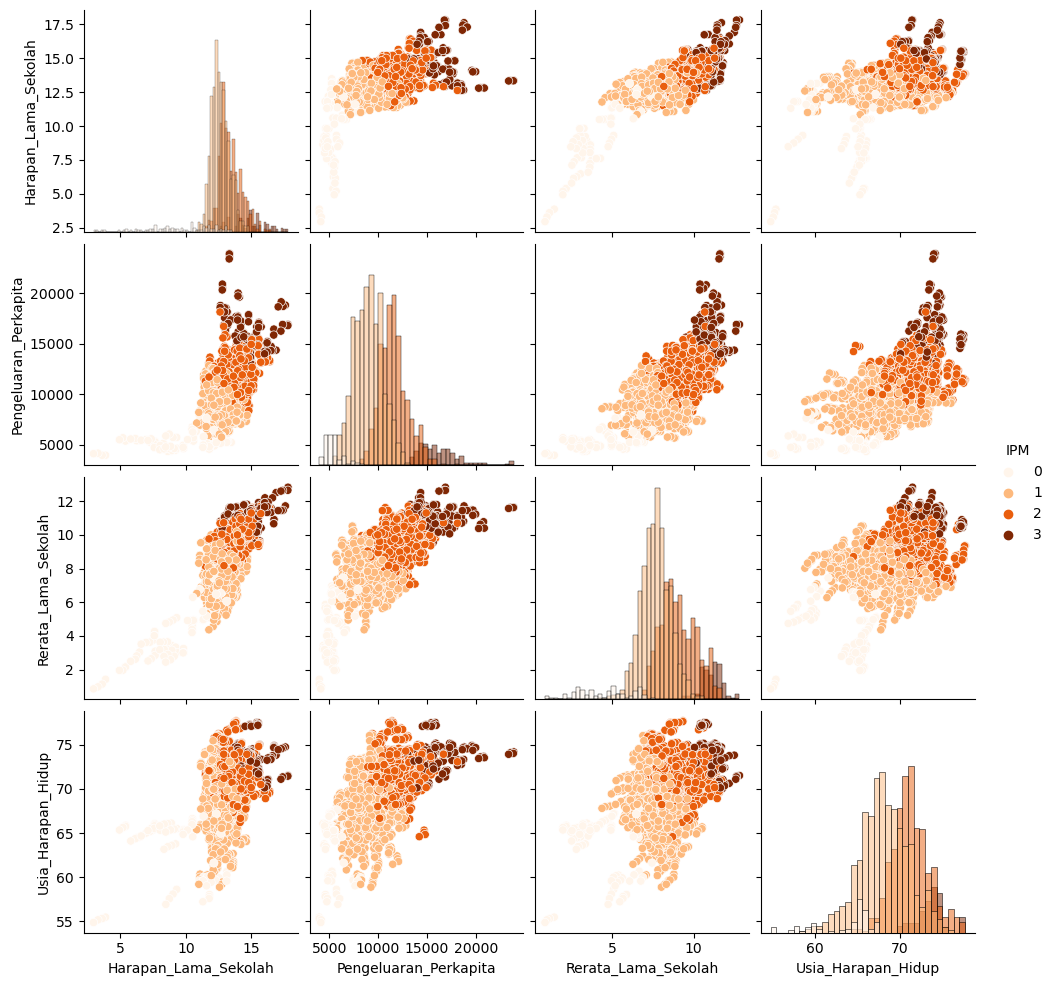

In [246]:
sns.pairplot(hue='IPM', diag_kind='hist', data=df, palette='Oranges')
plt.show()


# Modelling

In [200]:
X = df.drop(['IPM'],axis = 1)
y = df['IPM']

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((1471, 4), (725, 4))

# XGBoost Model

In [211]:
# Implementasi menggunakan model XGBoost
XGBclassifier = XGBClassifier(n_estimators=300, nthread=2, max_depth=4, seed=1700)
XGBclassifier.fit(X_train, y_train)
y_pred_XG = XGBclassifier.predict(X_test)


In [212]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred_XG)
cm

array([[ 30,   1,   0,   0],
       [  0, 351,   8,   0],
       [  0,   5, 277,   4],
       [  0,   0,   1,  48]], dtype=int64)

In [213]:
print(classification_report(y_test, y_pred_XG))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.98      0.98      0.98       359
           2       0.97      0.97      0.97       286
           3       0.92      0.98      0.95        49

    accuracy                           0.97       725
   macro avg       0.97      0.97      0.97       725
weighted avg       0.97      0.97      0.97       725



In [214]:
# Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', XGBclassifier.score(X_train, y_train))
# Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', XGBclassifier.score(X_test, y_test))

Skor akurasi data latih: 1.0
Skor akurasi data uji: 0.9737931034482759


# Balancing

In [215]:
SMOTE = SMOTE()
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [216]:
XGBclassifier = XGBClassifier()
XGBclassifier.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_XGB = XGBclassifier.predict(X_test)

In [217]:
XGBclassifier2 = XGBClassifier(n_estimators=300, nthread=2, max_depth=4, seed=1700)
XGBclassifier2.fit(X_train, y_train)
y_pred_XG = XGBclassifier.predict(X_test)

In [218]:
cm = confusion_matrix(y_test, y_pred_XG)
cm

array([[ 30,   1,   0,   0],
       [  0, 352,   7,   0],
       [  0,   7, 272,   7],
       [  0,   0,   0,  49]], dtype=int64)

In [219]:
print(classification_report(y_test, y_pred_XG))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.98      0.98      0.98       359
           2       0.97      0.95      0.96       286
           3       0.88      1.00      0.93        49

    accuracy                           0.97       725
   macro avg       0.96      0.97      0.96       725
weighted avg       0.97      0.97      0.97       725



In [220]:
# Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', XGBclassifier2.score(X_train_SMOTE, y_train_SMOTE))
# Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', XGBclassifier2.score(X_test, y_test))

Skor akurasi data latih: 0.9947984395318595
Skor akurasi data uji: 0.9737931034482759


# KKN Model

In [221]:
# Implementasi menggunakan model KNN
KNNClastifier = KNeighborsClassifier(n_neighbors=5)
KNNClastifier.fit(X_train, y_train)
y_pred_KNN = KNNClastifier.predict(X_test)

In [222]:
cm = confusion_matrix(y_test, y_pred_KNN)
cm

array([[ 22,   9,   0,   0],
       [  0, 312,  47,   0],
       [  0,  83, 195,   8],
       [  0,   0,  10,  39]], dtype=int64)

In [223]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        31
           1       0.77      0.87      0.82       359
           2       0.77      0.68      0.72       286
           3       0.83      0.80      0.81        49

    accuracy                           0.78       725
   macro avg       0.84      0.76      0.80       725
weighted avg       0.79      0.78      0.78       725



In [224]:
# Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', KNNClastifier.score(X_train, y_train))
# Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', KNNClastifier.score(X_test, y_test))

Skor akurasi data latih: 0.8286879673691366
Skor akurasi data uji: 0.783448275862069


# Balancing

In [239]:
KNNClastifier2 = KNeighborsClassifier(n_neighbors=5)
KNNClastifier2.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_KNN = KNNClastifier.predict(X_test)

In [240]:
cm = confusion_matrix(y_test, y_pred_KNN)
cm

array([[ 22,   9,   0,   0],
       [  0, 312,  47,   0],
       [  0,  83, 195,   8],
       [  0,   0,  10,  39]], dtype=int64)

In [241]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        31
           1       0.77      0.87      0.82       359
           2       0.77      0.68      0.72       286
           3       0.83      0.80      0.81        49

    accuracy                           0.78       725
   macro avg       0.84      0.76      0.80       725
weighted avg       0.79      0.78      0.78       725



In [242]:
# Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', KNNClastifier2.score(X_train_SMOTE, y_train_SMOTE))
# Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', KNNClastifier2.score(X_test, y_test))

Skor akurasi data latih: 0.8920676202860858
Skor akurasi data uji: 0.7448275862068966
